In [1]:
! git clone https://bitbucket.org/jadslim/german-traffic-signs 

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [2]:
! ls german-traffic-signs #p ext is for pickled file

signnames.csv  test.p  train.p	valid.p


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten #dropout sets to 0
from keras.layers.convolutional import Conv2D, MaxPooling2D #CNN
import pickle
import random
import cv2

In [4]:
%matplotlib inline
np.random.seed(0)

In [5]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f) #dictionary data

with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f) #dictionary data

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f) #dictionary data

print(type(train_data))

x_train, y_train = train_data['features'] , train_data['labels']
x_val, y_val = val_data['features'] , val_data['labels']
x_test, y_test = test_data['features'] , test_data['labels']

<class 'dict'>


In [6]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [7]:
assert(x_train.shape[0] == y_train.shape[0], 'No of img not equal to no of labels')
assert(x_test.shape[0] == y_test.shape[0], 'No of img not equal to no of labels')
assert(x_val.shape[0] == y_val.shape[0], 'No of img not equal to no of labels')
assert(x_train.shape[1:] ==(32, 32, 3), 'improper dimensions')
assert(x_val.shape[1:] ==(32, 32, 3), 'improper dimensions')
assert(x_test.shape[1:] ==(32, 32, 3), 'improper dimensions')

<ipython-input-7-0af3af7bf0ae>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_train.shape[0] == y_train.shape[0], 'No of img not equal to no of labels')
<ipython-input-7-0af3af7bf0ae>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_test.shape[0] == y_test.shape[0], 'No of img not equal to no of labels')
<ipython-input-7-0af3af7bf0ae>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_val.shape[0] == y_val.shape[0], 'No of img not equal to no of labels')
<ipython-input-7-0af3af7bf0ae>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_train.shape[1:] ==(32, 32, 3), 'improper dimensions')
<ipython-input-7-0af3af7bf0ae>:5: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x_val.shape[1:] ==(32, 32, 3), 'improper dimensions')
<ipython-input-7-0af3af7bf0ae>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  

In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv') 
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

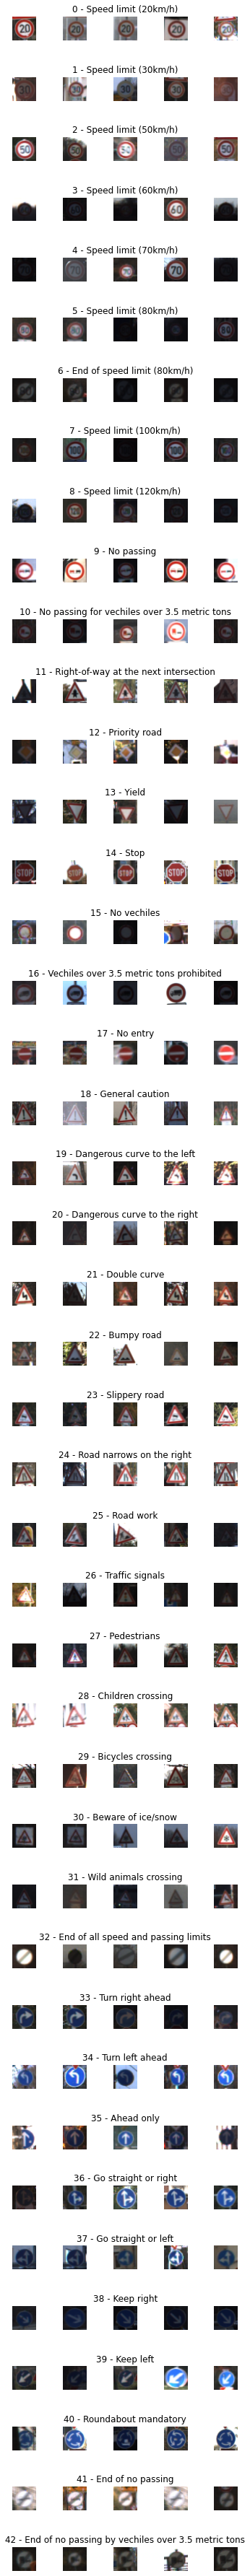

In [9]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

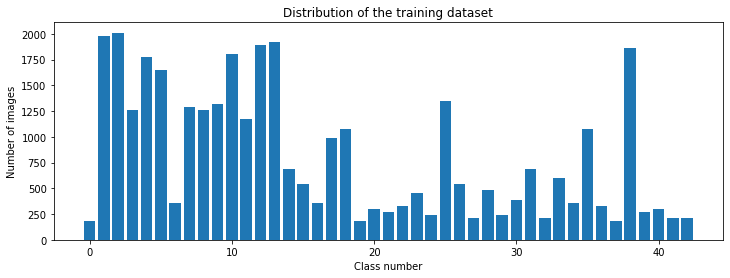

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


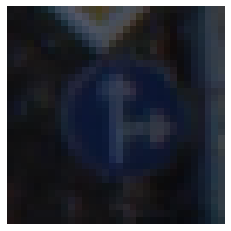

In [11]:
#CV2
plt.imshow(x_train[1000])
plt.axis('off')
print(x_train[1000].shape)
print(y_train[1000])

(32, 32)


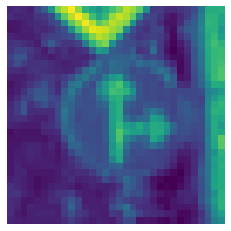

In [12]:
#1. grayscaling
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

img = grayscale(x_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)